<a href="https://colab.research.google.com/github/Theayussh/data-Analytics-project-house-price-prediction/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#importing the csv data to pandas data frame.
twt_data = pd.read_csv('/content/Twitter_Data.csv')

In [ ]:
twt_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
twt_data.shape

(162980, 2)

In [ ]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
twt_data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
twt_data.dropna(inplace=True)

In [ ]:
twt_data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
twt_data.shape

(162969, 2)

In [ ]:
twt_data['category'].value_counts()

category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

1.0 ---> positive sentiment
0.0 ---> neutral sentiment
-1.0 --> negative sentiment

STEMMING

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [ ]:
twt_data.columns

Index(['clean_text', 'category'], dtype='object')

In [ ]:
twt_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
twt_data['stemmed_content'] = twt_data['clean_text'].apply(stemming)

In [ ]:
twt_data.head()

,clean_text,category,stemmed_content
0,when modi promised “minimum government maximum...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


In [ ]:
#separating the data and label.
X = twt_data['stemmed_content'].values
Y = twt_data['category'].values

In [ ]:
print(X)

['modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ'
 'talk nonsens continu drama vote modi'
 'say vote modi welcom bjp told rahul main campaign modi think modi relax'
 ... 'cover interact forum left'
 'big project came india modi dream project happen realiti'
 'ever listen like gurukul disciplin maintain even narendra modi rss maintain cultur indian attack polit someon attack hinduism rss take action proud']


In [ ]:
print(Y)

[-1.  0.  1. ...  0.  0.  1.]


In [ ]:
#Splitting the data into Train and Test data:-
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(162969,) (130375,) (32594,)


In [ ]:
# feature extraction
#converting text data into numerical data.
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 28743)	0.16144962488758455
  (0, 20978)	0.15479943877392816
  (0, 50384)	0.12988943705645903
  (0, 40067)	0.03080998402945807
  (0, 66302)	0.1435219122722211
  (0, 17850)	0.3817977967743573
  (0, 43120)	0.22291765786234816
  (0, 2034)	0.22573882918468724
  (0, 28781)	0.16797131234622645
  (0, 40393)	0.16396791065369923
  (0, 5012)	0.1613648461909348
  (0, 20422)	0.22664524725751634
  (0, 49423)	0.16421731815523039
  (0, 47497)	0.09688951516287975
  (0, 39426)	0.18227525083206278
  (0, 35892)	0.23025229242873607
  (0, 57982)	0.26612892189445914
  (0, 68125)	0.2248614991186051
  (0, 39514)	0.1809730472121113
  (0, 51719)	0.17437940942836028
  (0, 39243)	0.4748512441133469
  (1, 24267)	0.12664393809286514
  (1, 37545)	0.28573581089266126
  (1, 21221)	0.17809460359176146
  (1, 14076)	0.22357950358283196
  :	:
  (130372, 19548)	0.23311499327392124
  (130372, 37068)	0.3399756765290224
  (130372, 49124)	0.17228211716582778
  (130372, 35639)	0.17304961608306435
  (130372, 36113)	0.168665

In [ ]:
print(X_test)

  (0, 70684)	0.3654149628097209
  (0, 66014)	0.45784497985286926
  (0, 55677)	0.24200813532769908
  (0, 53119)	0.5740234816604777
  (0, 44277)	0.3329310283820778
  (0, 40067)	0.07279159587619888
  (0, 36113)	0.30985338388557265
  (0, 13125)	0.23796675969722694
  (1, 69743)	0.23602561185313362
  (1, 69468)	0.19826967725609115
  (1, 64863)	0.2524313718526405
  (1, 62901)	0.17942214875438922
  (1, 58144)	0.20903722861121768
  (1, 53990)	0.2311755329435266
  (1, 51265)	0.16670571485515115
  (1, 40067)	0.038496991353423785
  (1, 39524)	0.14993361029132493
  (1, 35472)	0.21172428361723097
  (1, 31506)	0.31226674264058546
  (1, 30016)	0.33252736500192187
  (1, 28131)	0.2095224388833978
  (1, 17578)	0.18553313487676096
  (1, 17089)	0.2247105266594949
  (1, 11741)	0.28858700512651103
  (1, 8128)	0.2828109113508008
  :	:
  (32591, 51602)	0.3019021318548467
  (32591, 40067)	0.08155814336840318
  (32591, 36622)	0.38797626729888585
  (32591, 34162)	0.30099471305438064
  (32591, 17758)	0.29367958382

In [ ]:
# training machine learning model using logistic regression
mdl = LogisticRegression(max_iter=1200)
mdl.fit(X_train, Y_train)

LogisticRegression(max_iter=1200)

Model evaluation:-
  Accuracy Score

In [ ]:
#accuracy score of training data.
X_train_prediction = mdl.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('The accuracy score of training data is :', training_data_accuracy)

The accuracy score of training data is : 0.8784429530201342


So, we got the accuracy score of training data :- 87.84%

In [ ]:
# accuracy score of test data.
X_test_prediction = mdl.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('The accuracy score of test data is :', test_data_accuracy)

The accuracy score of test data is : 0.8435908449407866


So, we got the accuracy score of our test data is:- 84.35%

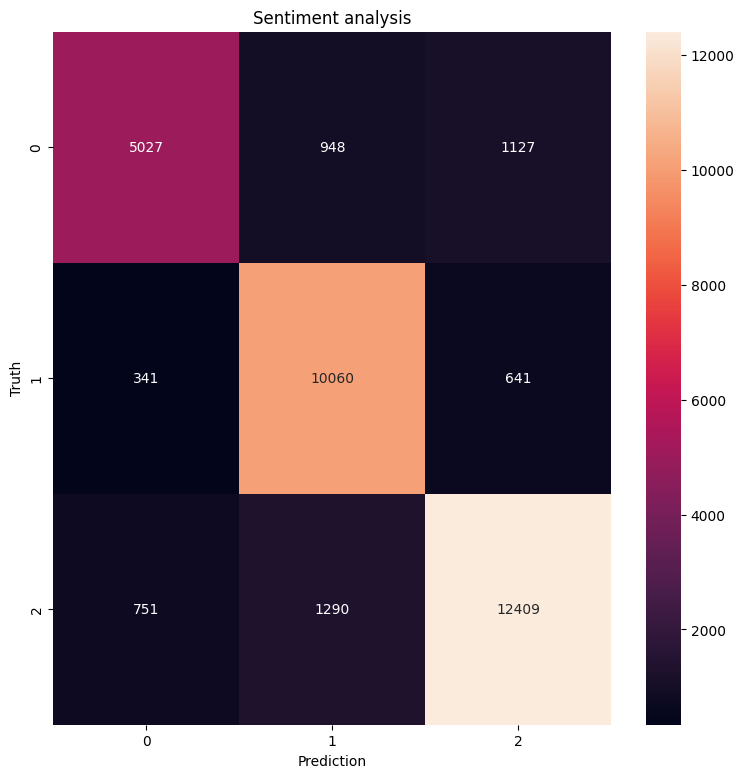

In [ ]:
# Import the necessary library
from sklearn.metrics import confusion_matrix

# ... (Your existing code)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot the heatmap
plt.figure(figsize=(9,9), edgecolor='red')
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Sentiment analysis')
plt.show()

In [ ]:
import pickle

In [ ]:
filename = 'train_mdl.sav'
pickle.dump(mdl, open(filename, 'wb'))

In [ ]:
loaded_mdl = pickle.load(open('/content/train_mdl.sav', 'rb'))

In [ ]:
X_new = X_test[8700]
print(Y_test[8700])

prediction = mdl.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The sentiment is neutral')
elif (prediction[0]==1):
  print('The sentiment is positive')
elif (prediction[0]==-1):
  print('The sentiment is negative')
else:
  print('error')

0.0
[0.]
The sentiment is neutral


In this sentiment analysis project i learn alot of techniques, features and about libraries.
learn natural langauge toolkit, feature extraction, data pree processing, haandling imbalanced data, missing values, null values.
visualization techniques.